# Compression with DFT

In this notebook I implement the Discrete Fourier Transform to compress an image

In [5]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
import matplotlib.pylab as pylab

from skimage import data
from skimage.color import rgb2gray

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

In [23]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

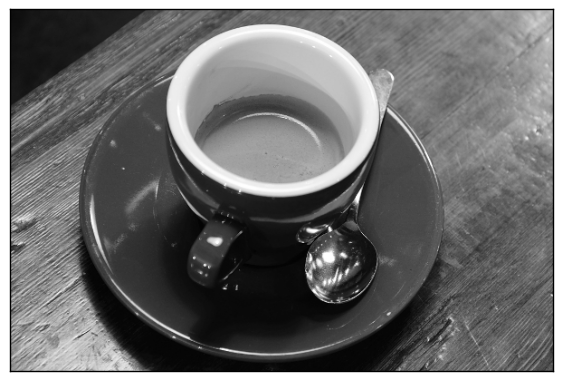

In [25]:
im = rgb2gray(data.coffee().astype(float))
imshow(im)

In [50]:
imsize = im.shape
dft = zeros(imsize,dtype='complex');
im_dft = zeros(imsize,dtype='complex');

# 8x8 DFT
dft_size = 4
for i in r_[:imsize[0]:dft_size]:
    for j in r_[:imsize[1]:dft_size]:
        dft[i:(i+dft_size),j:(j+dft_size)] = np.fft.fft2( im[i:(i+dft_size),j:(j+dft_size)] )

# Thresh
thresh = 0.013
dft_thresh = dft * (abs(dft) < (thresh*np.max(abs(dft))))


percent_nonzeros_dft = np.sum( dft_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
print("Keeping only %f%% of the DFT coefficients" % (percent_nonzeros_dft*100.0))

# 8x8 iDFT
for i in r_[:imsize[0]:dft_size]:
    for j in r_[:imsize[1]:dft_size]:
        im_dft[i:(i+dft_size),j:(j+dft_size)] = np.fft.ifft2( dft_thresh[i:(i+dft_size),j:(j+dft_size)] )

Keeping only 78.084167% of the DFT coefficients


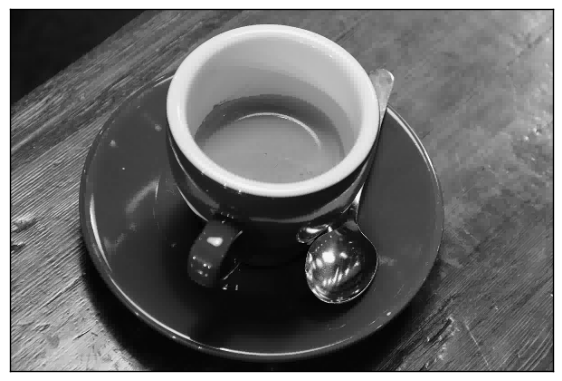

In [47]:
imshow(abs(im_dft))

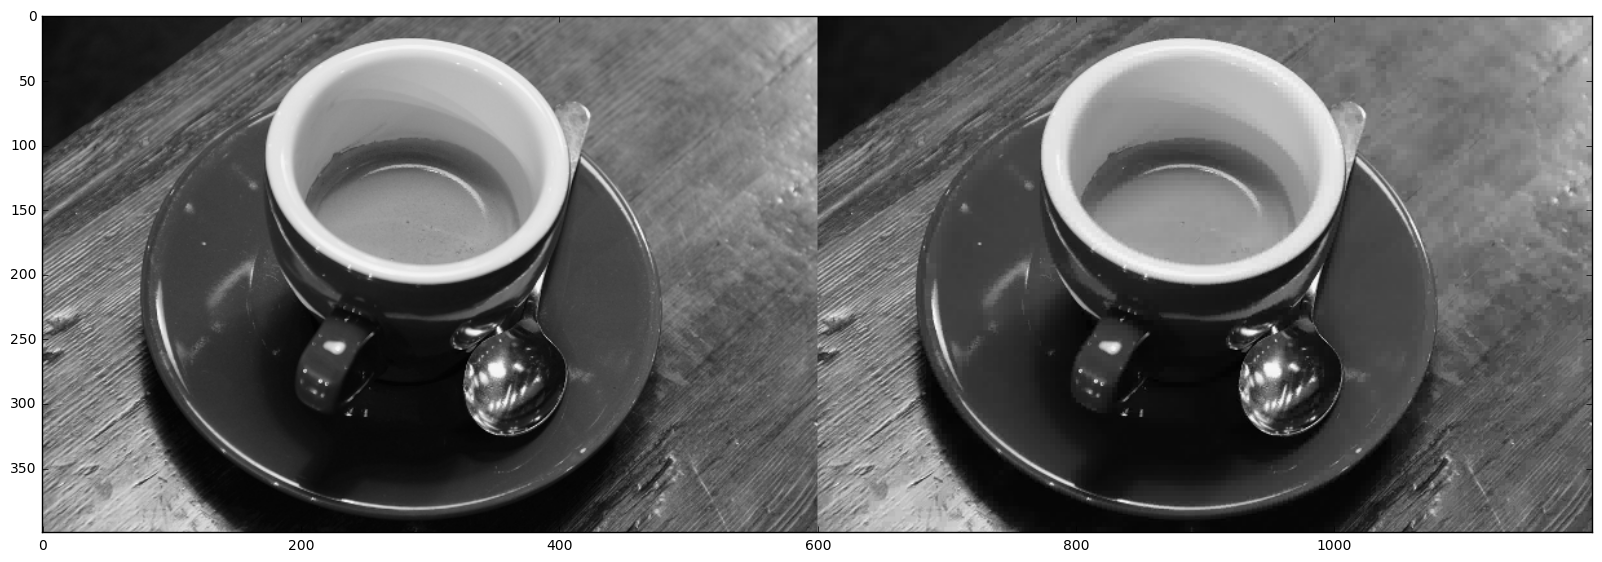

In [48]:
plt.imshow( np.hstack( (im, abs(im_dft)) ) ,cmap='gray')
plt.show()

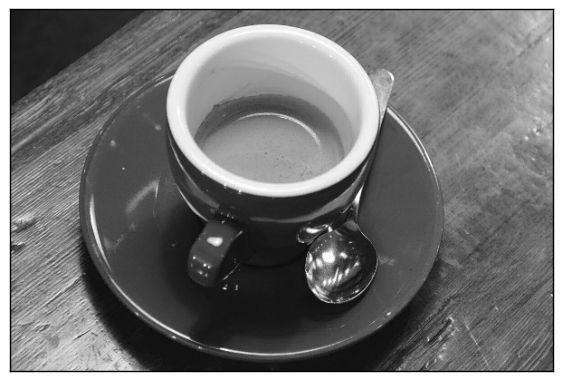

In [51]:
imshow(im-abs(im_dft))